## Case Study on Probability for Data Science

Problem Statement: 
    
To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

Attribute Information:
    
• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
    
• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
    
• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,
red=e, white=w, yellow=y 

• bruises: bruises=t, no=f 
    
• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,
pungent=p, spicy=s 

• gill-attachment: attached=a, descending=d, free=f, notched=n 
    
• gill-spacing: close=c, crowded=w, distant=d 
    
• gill-size: broad=b, narrow=n 
    
• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, 
pink=p, purple=u, red=e, white=w, yellow=y 

• stalk-shape: enlarging=e, tapering=t 
    
• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, 
missing=? 

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
    
• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
    
• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
    pink=p, red=e, white=w, yellow=y 
    
• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y 

• veil-type: partial=p, universal=u 
    
• veil-colour: brown=n, orange=o, white=w, yellow=y 
    
• ring-number: none=n, one=o, two=t 
    
• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,
sheathing=s, zone=z 

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,
purple=u, white=w, yellow=y 

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,
solitary=y 

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d 

Please note the following
Use the wine data file attached along with the question.

### Importing libraries

In [296]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### loading the dataset

In [297]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [298]:
#to display all columns of the dataframe
pd.pandas.set_option('display.max_columns',None)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### The info() method will give summary of the dataset. The basic information about the dataset including the index dtype,column dtypes, non-null values and memory usage.

In [300]:
data.shape

(8124, 23)

### The dataset has 8124 rows and 23 columns.

In [301]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### This is to check the null values present in dataset. in this mushroom dataset has no null values.

In [302]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### The .describe() method will give the statistics of the columns such as 

count shows the number of responses.

unique shows the number of unique categorical values.

top shows the highest-occurring categorical value.

freq shows the frequency/count of the highest-occurring categorical value.

In [303]:
data['class'].unique() #Unique occurrences of ‘class’ column

array(['p', 'e'], dtype=object)

In [304]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

### There are 4208 occurrences of edible mushrooms and 3916 occurrences of poisonous mushrooms in the dataset.

Text(0.5, 0, 'Class')

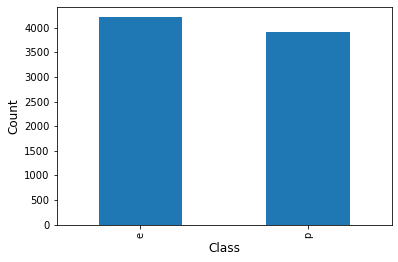

In [305]:
data['class'].value_counts().plot(kind = 'bar')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)

### This plot shows the count of edible mushrooms and poisonous mushrooms in the dataset.¶

### Label Encoding

In [306]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [307]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [308]:
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [309]:
data = data.drop(["veil-type"],axis=1)

### Correlation matrix is plotted to check the relationship between variables.

<AxesSubplot:>

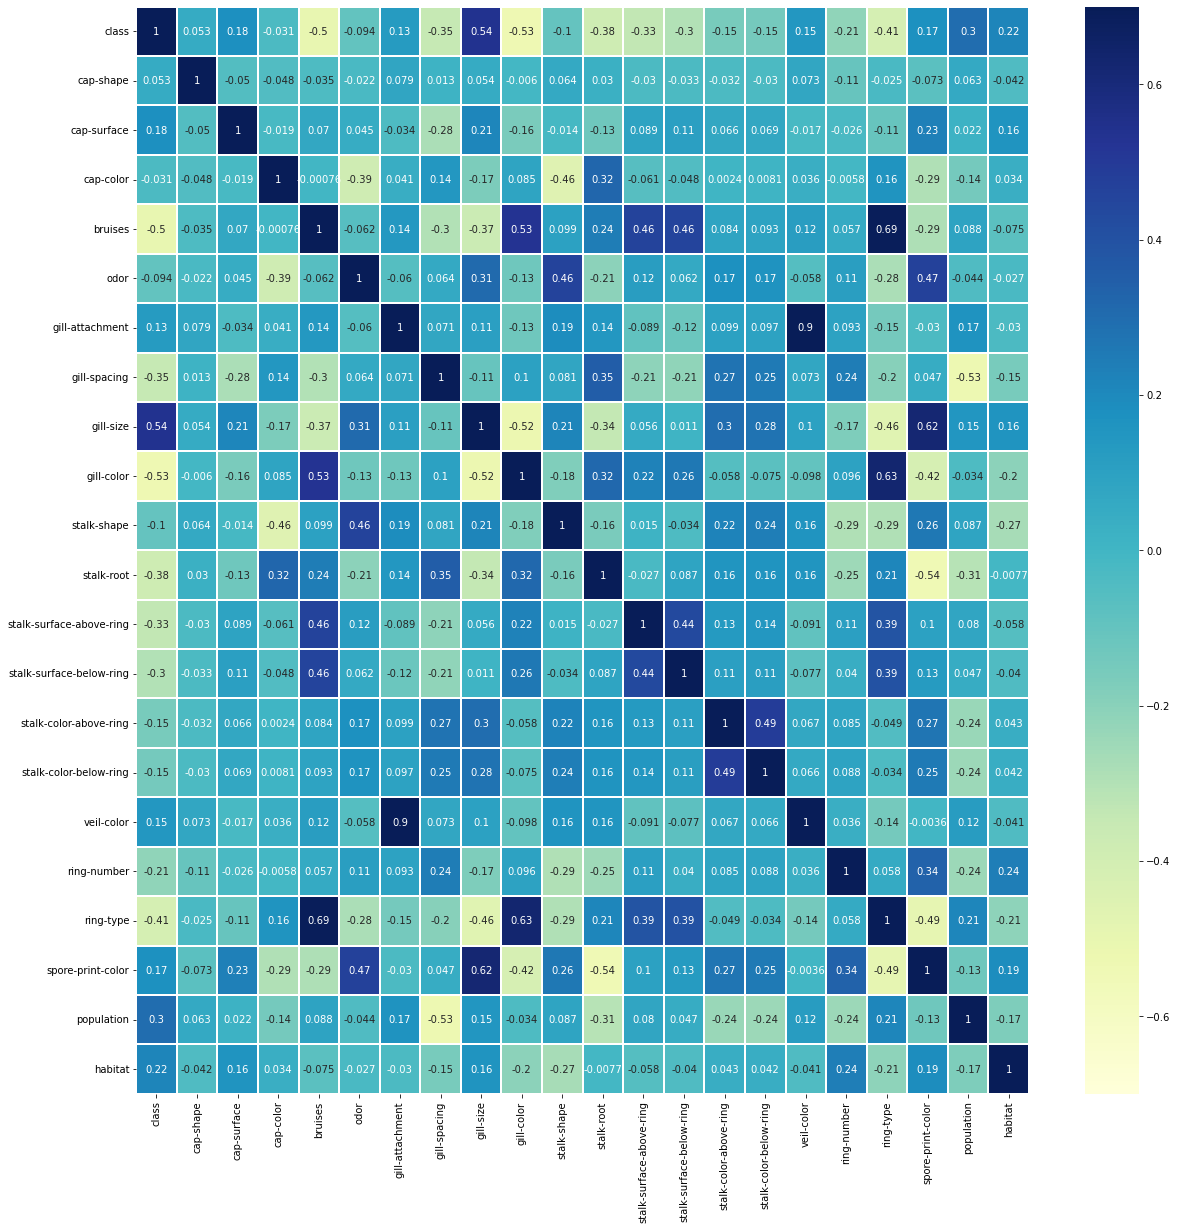

In [310]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmatrix,vmin=-.7,vmax=0.7,annot=True,linewidth=0.2,cmap ="YlGnBu")

In [311]:
# spliting into features and label
y=data['class']
X=data.drop('class',axis=1)


# Splitting the data into train n test

In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.2)

### Model Application

## 1. Logistic Regression

In [313]:
from sklearn.linear_model import LogisticRegression
#have to create instance of the model then storing  a variable in it.
logit_model = LogisticRegression()
#have to fit this into x tarin and y train to create the model
logit_model.fit(X_train, y_train)
# we have to predict the values in x test using this model created and storing those values to y_pred

y_pred = logit_model.predict(X_test)

In [314]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [315]:
print(y_test.values)

[0 1 1 ... 1 1 1]


In [316]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

In [317]:
print("Accuracy is : ", accuracy_score(y_test, y_pred))
print("Precision is : " ,precision_score(y_test, y_pred))
print("Recall is : " ,recall_score(y_test, y_pred))
print("f1 score is : " ,f1_score(y_test, y_pred))

Accuracy is :  0.947076923076923
Precision is :  0.9427480916030534
Recall is :  0.9475703324808185
f1 score is :  0.9451530612244898


### Confusion Matrix of Logistic Regression Model.

In [318]:
confusion_matrix(y_test,y_pred)

array([[798,  45],
       [ 41, 741]], dtype=int64)

## 2. KNN Model

In [319]:
from sklearn.neighbors import KNeighborsClassifier

In [320]:
acc_values = []
neighbors = np.arange(3,15)
# creating a loop to create KNN model for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')#no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier.fit(X_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(X_test)#KNN is created
#append the accurcy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc 
#append these accuracy values to our list
    acc_values.append(acc)

In [321]:
acc_values 

[0.9981538461538462,
 0.9963076923076923,
 0.9963076923076923,
 0.9969230769230769,
 0.9956923076923077,
 0.9950769230769231,
 0.9950769230769231,
 0.9950769230769231,
 0.9956923076923077,
 0.9938461538461538,
 0.9944615384615385,
 0.9938461538461538]

### To find for which k value we got highest accuracy. for that we need to plot a graph between neighbor values ie k values and accuracy values¶

Text(0, 0.5, 'accuracy')

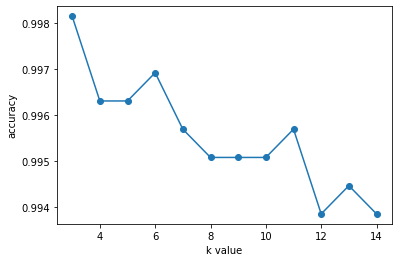

In [322]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

### we can make a model with k =1

In [323]:
classifier = KNeighborsClassifier(n_neighbors= 1, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [324]:
print(y_test.values)

[0 1 1 ... 1 1 1]


In [325]:
#have to print all these.compare y_test and y_pred
print("Accuracy is : ", accuracy_score(y_test, y_pred))
print("Precision is : " ,precision_score(y_test, y_pred))
print("Recall is : " ,recall_score(y_test, y_pred))
print("f1 score is : " ,f1_score(y_test, y_pred))

Accuracy is :  0.9993846153846154
Precision is :  0.9987228607918263
Recall is :  1.0
f1 score is :  0.9993610223642173


## Confusion Matrix for KNN Classifier

In [326]:
confusion_matrix(y_test,y_pred)

array([[842,   1],
       [  0, 782]], dtype=int64)

## 3. Decision tree classifier

In [327]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [328]:
print(y_test.values)

[0 1 1 ... 1 1 1]


In [329]:
print('Accuracy on Decision tree model is', accuracy_score(y_test,y_pred))

Accuracy on Decision tree model is 1.0


### Confusion Matrix of  Decision tree  Model.

In [330]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

## 4. Support Vector Machine

### Linear svm

In [331]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [332]:
y_pred = svm_linear.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [333]:
print(y_test.values)

[0 1 1 ... 1 1 1]


### Confusion Matrix of Linear SVM Model.

In [334]:
confusion_matrix(y_test,y_pred)

array([[829,  14],
       [ 30, 752]], dtype=int64)

### Polynomial SVM

In [335]:
svm_poly = SVC(kernel = 'poly', degree=3)

In [336]:
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [337]:
y_pred = svm_poly.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [338]:
print(y_test.values)

[0 1 1 ... 1 1 1]


In [339]:
print("Accuracy is", accuracy_score(y_test,y_pred))

Accuracy is 1.0


### Confusion Matrix of Polynomial SVM Model.

In [340]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

## Radial SVM

In [341]:
svm_radial = SVC(kernel='rbf')

In [342]:
svm_radial.fit(X_train,y_train)

SVC()

In [343]:
y_pred=svm_radial.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [344]:
print(y_test.values)

[0 1 1 ... 1 1 1]


In [345]:
print("Accuracy is", accuracy_score(y_test,y_pred))

Accuracy is 0.9938461538461538


### Confusion Matrix of Polynomial SVM Model.

In [346]:
confusion_matrix(y_test,y_pred)

array([[842,   1],
       [  9, 773]], dtype=int64)

## Polynomial SVM is having 100% accuracy.

## 5. Random Forest

In [347]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#training the model
rf.fit(X_train,y_train)
#to make predictions
y_pred=rf.predict(X_test)

## Evaluating the performance

In [348]:
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_pred)

1.0

## The value of f1 should lie between 0 and 1.if nearer to 0 the model is not good.Here f1_score is 1 so it is a very good model.

In [349]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [350]:
print(y_test.values)

[0 1 1 ... 1 1 1]


In [351]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

## feature importance

In [352]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

odor                        16.322509
gill-size                   13.742115
gill-color                  11.098539
spore-print-color            9.727326
population                   7.140130
ring-type                    6.283681
bruises                      5.254442
stalk-surface-above-ring     5.088651
stalk-surface-below-ring     4.674713
stalk-root                   4.304389
gill-spacing                 4.023730
habitat                      2.748794
stalk-shape                  2.187227
cap-color                    1.525532
stalk-color-above-ring       1.374597
stalk-color-below-ring       1.309640
ring-number                  1.088108
cap-surface                  0.791932
cap-shape                    0.459578
gill-attachment              0.440645
veil-color                   0.413722
dtype: float64

### We can drop features with less importance and the create the model.

## 6. Naive Bayes Classification

### Fitting Gaussian Naive Bayes to the Training Set:

In [353]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Prediction of the test set result:

In [354]:
# 0 - Edible
# 1 - Poisonous
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [355]:
print(y_test.values)

[0 1 1 ... 1 1 1]


### Accuracy 

In [356]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.9218461538461539

### Confusion Matrix

In [357]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[771,  72],
       [ 55, 727]], dtype=int64)

### 1498 are predicted correctly and 127 are predicted wrongly.

### For multinomial we can make use of BernoulliNB

In [358]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

### Prediction of the test set result

In [359]:
# 0 - Edible
# 1 - Poisonous
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [360]:
print(y_test.values)

[0 1 1 ... 1 1 1]


### Accuracy

In [361]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.8418461538461538

### Confusion Matrix

In [362]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[797,  46],
       [211, 571]], dtype=int64)

## Inference

Accuracy

    1. Logistic Regression 0.947076923076923
    
    2. KNN Model 0.9993846153846154
    
    3. Decision tree classifier 1.0
    
    4. Polynomial SVM 1.0
    
    5. Random Forest 1.0
    
    6. Naive Bayes Classification
    
            Gaussian Naive Bayes 0.9218461538461539
            
            Multinomial 0.8418461538461538
   
    Confusion Matrix is balanced for Decision tree, Polynomial SVM and Random Forest.
    
    For KNN Model, Decision tree classifier, Gaussian Naive Bayes, SVM, Random Forest and Gaussian Naive Bayes predicted values and true values are same.
    

# Wine dataset

### Wine dataset is included in sklearn library.

In [363]:
from sklearn.datasets import load_wine
wine = load_wine() #create an object and load this wine data
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### Feature names are displayed

In [364]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [365]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Target name has three classes 0, 1 and 2


In [366]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### WE can know dataset characteristics, 178 rows and 13 columns,Summary Statistics, missing values etc

### Convert the data into Pandas Dataframe¶

In [367]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [368]:
df.head()#first five values by default

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [369]:
df.tail(3)#last 3 entries

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [370]:
df.shape

(178, 13)

### There are 178 rows and 13 columns in the dataset.

### Add the target to dataframe

In [371]:
df['Target'] = wine.target

In [372]:
df.head()# target is added as last column

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [373]:
df.shape

(178, 14)

### Now there are 14 columns.

In [374]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Target'],
      dtype='object')

### We can get all the column names.

In [375]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
Target                            int32
dtype: object

### This gives the datatype of all feature variables and target. Target variable is of integer datatype.

In [376]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

### To check if there are any null values.In this dataset no null values are present.

In [377]:
df['Target'].value_counts()

1    71
0    59
2    48
Name: Target, dtype: int64

### This gives the instances of each class. class 0 has 59, class 1 has 71 and class 2 has 48 instances.

<AxesSubplot:xlabel='Target', ylabel='count'>

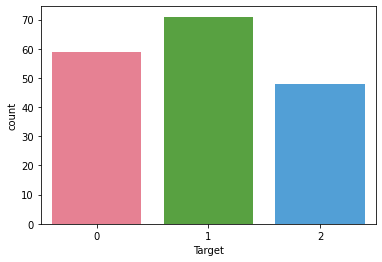

In [378]:
sns.countplot(df['Target'], palette ='husl')

### WE can see the count of classes 0, 1, 2.class 1 is greater than 70. Class 0 is less than 60 and Class 2 is less than 50.

### Correlation among several features and with the target¶

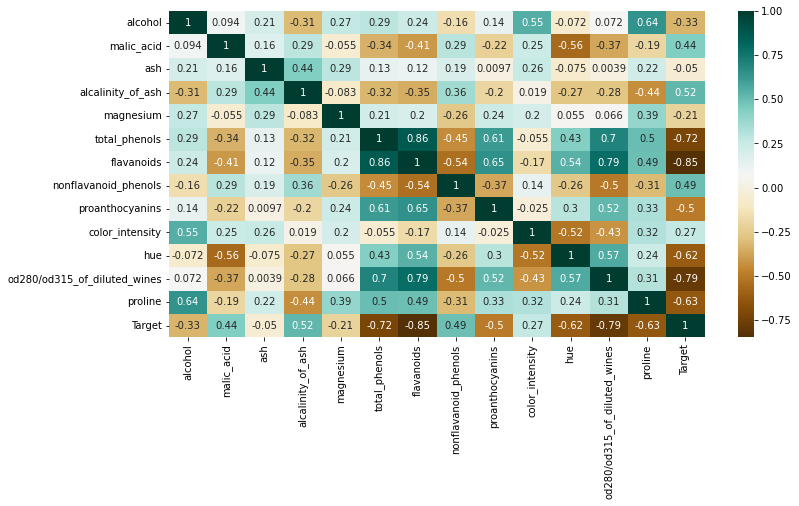

In [379]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='BrBG');

### We can notice a high correlation between flavanoids and total_phenols.Negative correlation between flavanoids and Target. Also d280/od315_of_diluted_wines, proline and hue with target.¶

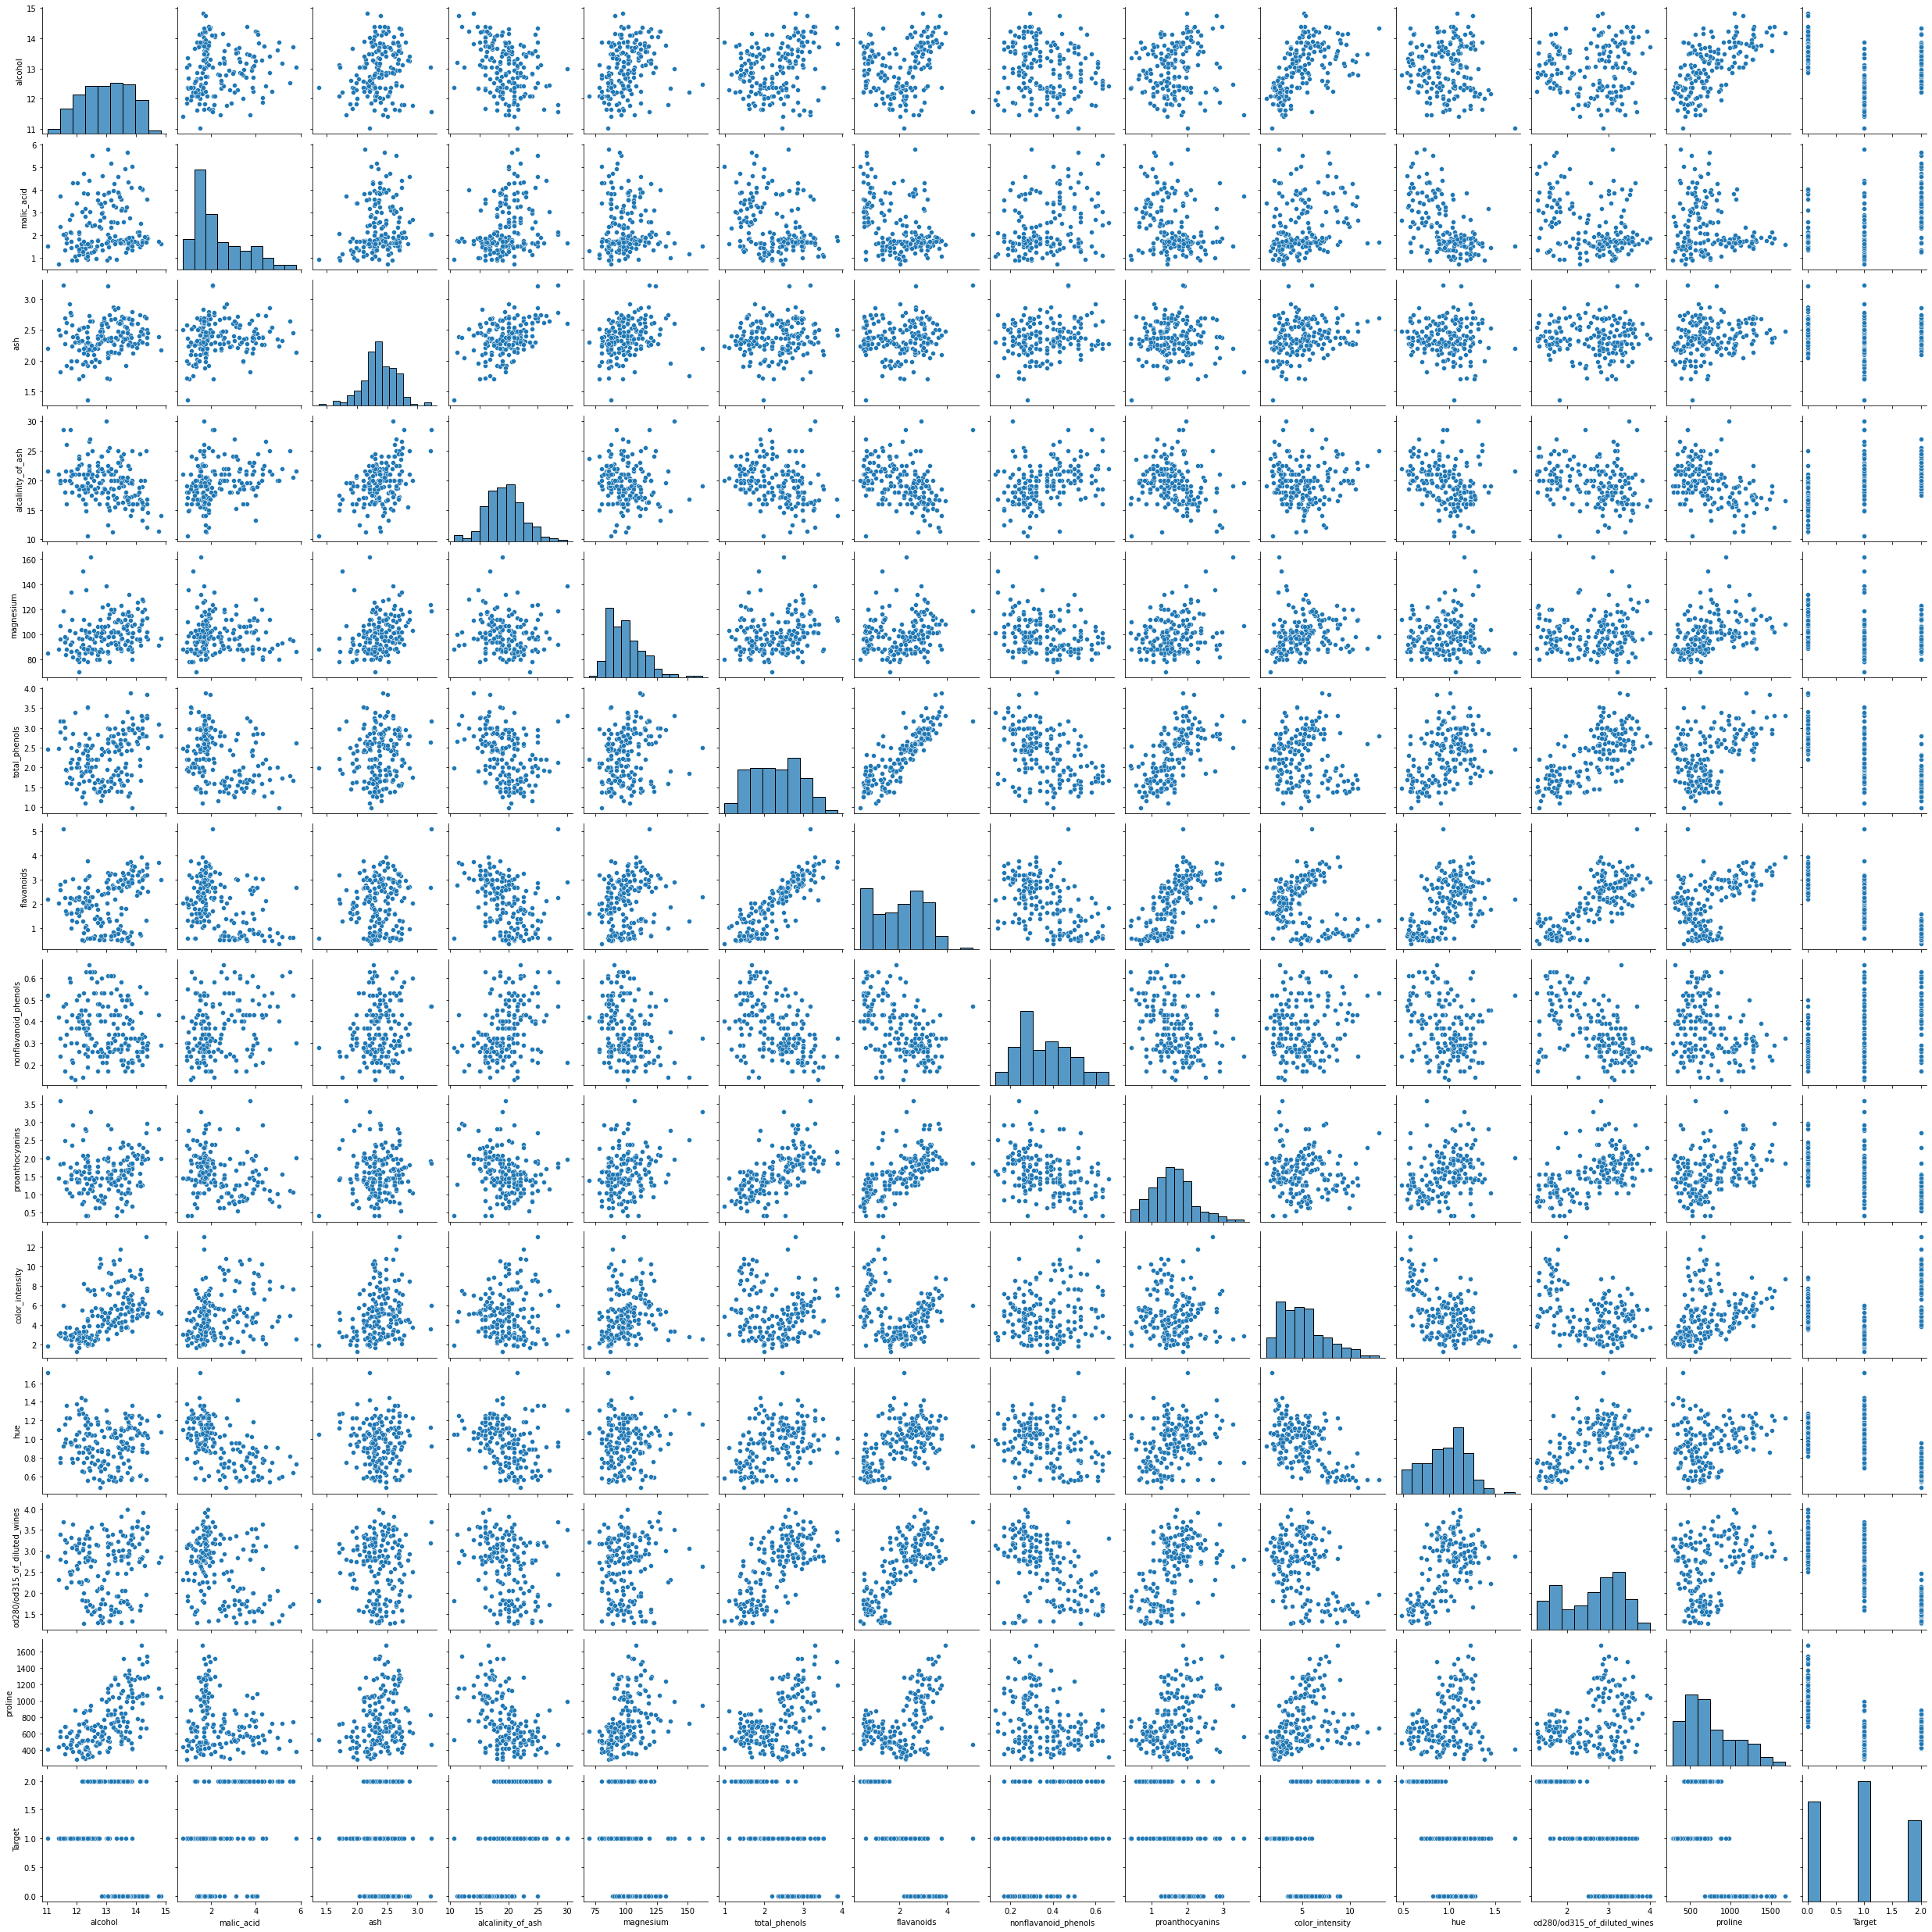

In [380]:
sns.pairplot(df)

### This plot  is to understand the relation between two variables whether it linear, non linear etc.

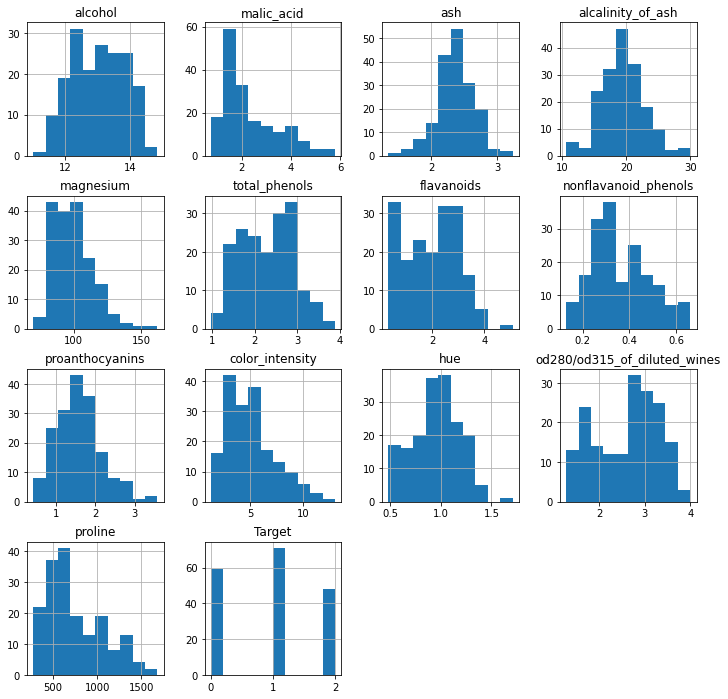

In [381]:
df.hist(figsize=(12,12))
import warnings
warnings.filterwarnings('ignore')

### This is to know about the distribution of data.how high or low the data is. we can know about skewed values and outliers.

## Box and Whiskers Plot

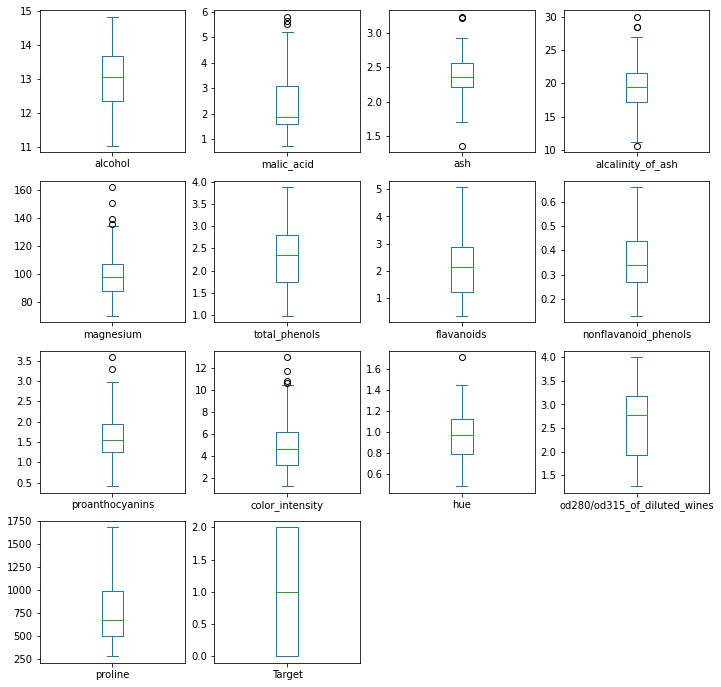

In [382]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,12))
import warnings
warnings.filterwarnings('ignore')

### It gives the information about outliers which the affect the data.Alcohol is finely distributed.malic_acid, ash, alcalinity_of_ash, magnesium,proanthocyanins,color_intensity, hue are having outliers.

<AxesSubplot:xlabel='Target', ylabel='Density'>

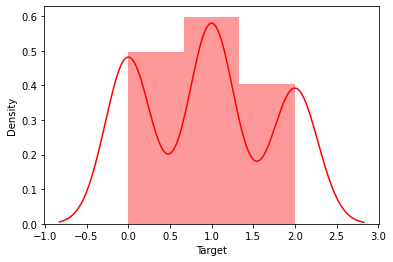

In [383]:
sns.distplot(df['Target'], color='r')

### Distribution plot shows histogram and kde.

<AxesSubplot:xlabel='Target', ylabel='flavanoids'>

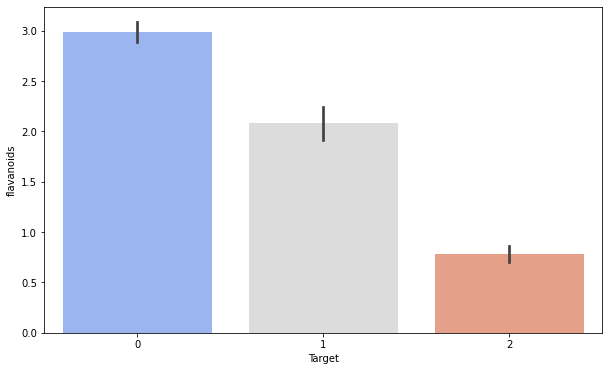

In [384]:
fig = plt.figure(figsize= (10,6))
sns.barplot(x='Target', y='flavanoids', data=df, palette='coolwarm')

### Barplot between Target and flavanoids. Flavanoids for class 0 is higher than class 1 and class 2.

<AxesSubplot:xlabel='Target', ylabel='alcohol'>

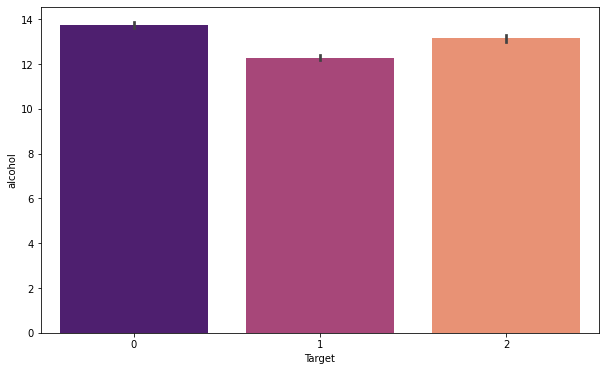

In [385]:
fig = plt.figure(figsize= (10,6))
sns.barplot(x='Target', y='alcohol', data=df, palette='magma')

### Barplot between target and alcohol.class 0 is having highest alcohol content.

<AxesSubplot:xlabel='Target', ylabel='ash'>

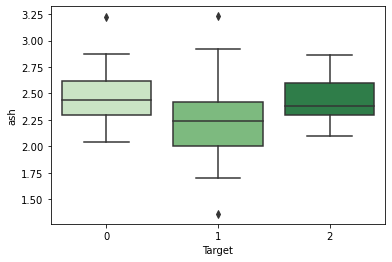

In [386]:
sns.boxplot(x='Target',y='ash', data=df, palette='Greens' )

### Boxplot for ash and target. It shows the presence of outliers.

## Preprocessing

## Outliers

### malic_acid, ash, alcalinity_of_ash, magnesium,proanthocyanins,color_intensity, hue are having outliers.

## Removing outliers

In [387]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df_data,ft):
    Q1=df_data[ft].quantile(0.25)
    Q3=df_data[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df_data[ft]<lower) | (df_data[ft]>upper)]
    return ls

In [388]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Target'],
      dtype='object')

In [389]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['malic_acid', 'ash','alcalinity_of_ash','magnesium','proanthocyanins','color_intensity','hue']:
    index_list.extend(outliers(df,feature))
index_list

[123,
 137,
 173,
 25,
 59,
 121,
 59,
 73,
 121,
 127,
 69,
 73,
 78,
 95,
 95,
 110,
 151,
 158,
 159,
 166,
 115]

In [390]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df_data,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df_data=df_data.drop(ls)
    return df_data

In [391]:
df.shape

(178, 14)

In [392]:
df=remove(df,index_list)

In [393]:
df.shape

(161, 14)

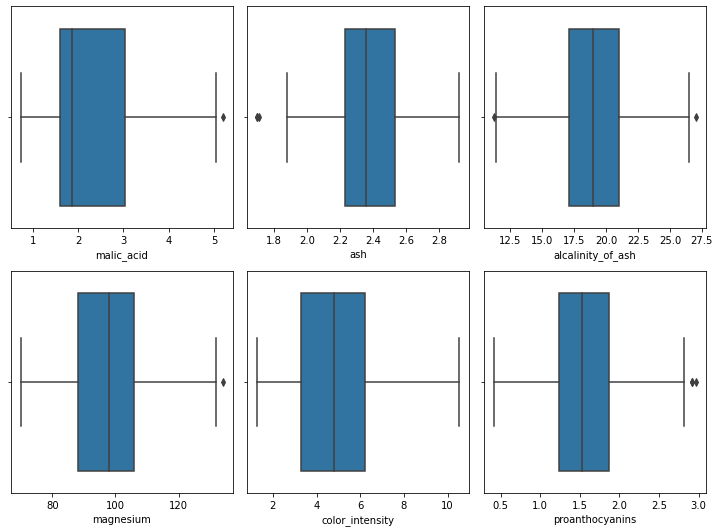

In [394]:
fig, axs = plt.subplots(2,3, figsize = (10,7.5))
plt1 = sns.boxplot(df['malic_acid'], ax = axs[0,0])
plt2 = sns.boxplot(df['ash'], ax = axs[0,1])
plt3 = sns.boxplot(df['alcalinity_of_ash'], ax = axs[0,2])
plt4 = sns.boxplot(df['magnesium'], ax = axs[1,0])
plt5 = sns.boxplot(df['color_intensity'], ax = axs[1,1])
plt6 = sns.boxplot(df['proanthocyanins'], ax = axs[1,2])


plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

## Model Buliding

In [395]:
Xwine= df.drop(['Target'], axis = 1)
ywine = df['Target']

In [396]:
Xwine_train,Xwine_test,ywine_train,ywine_test = train_test_split(Xwine,ywine, random_state=42,test_size=0.2)#assigninng values

### Check how many datapoints are their in training set.

In [397]:
Xwine_train.shape

(128, 13)

In [398]:
ywine_train.shape

(128,)

In [399]:
Xwine_test.shape

(33, 13)

In [400]:
ywine_test.shape

(33,)

## 1. Logistic Regression Model

In [401]:
logit_model = LogisticRegression()
logit_model.fit(Xwine_train, ywine_train)
ywine_pred = logit_model.predict(Xwine_test)

In [402]:
ywine_pred

array([1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1])

In [403]:
print(ywine_test.values)

[1 1 2 0 1 0 1 0 1 2 0 1 0 1 0 0 2 2 1 0 1 0 0 0 0 2 1 0 2 1 2 1 1]


In [404]:
print("Accuracy is : ", accuracy_score(y_test, y_pred))
print("Precision is : " ,precision_score(y_test, y_pred, average ='micro'))
print("Recall is : " ,recall_score(y_test, y_pred, average ='micro'))
print("f1 score is : " ,f1_score(y_test, y_pred, average ='micro'))

Accuracy is :  0.8418461538461538
Precision is :  0.8418461538461538
Recall is :  0.8418461538461538
f1 score is :  0.8418461538461538


### Confusion Matrix of Logistic Regression Model

In [405]:
confusion_matrix(ywine_test,ywine_pred)

array([[12,  1,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]], dtype=int64)

## 2. KNN Model

In [406]:
acc_values = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')#no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier.fit(Xwine_train,ywine_train)
#have to predict output using this model.
    ywine_pred = classifier.predict(Xwine_test)#KNN is created
#append the accuracy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(ywine_test, ywine_pred)#taking accuracy values to variable acc 
#append these accuracy values to our list
    acc_values.append(acc)

In [407]:
acc_values 

[0.6666666666666666,
 0.7272727272727273,
 0.6666666666666666,
 0.696969696969697,
 0.696969696969697,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.6666666666666666,
 0.7878787878787878,
 0.696969696969697,
 0.7575757575757576]

### Different accuracy values for different k values. 78.78 is the highest accuracy.

### Plot a graph between neighbor values ie k values and accuracy values to find for which k value has got highest accuracy.

Text(0, 0.5, 'accuracy')

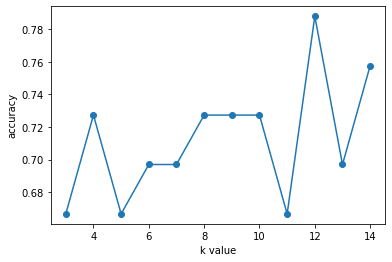

In [408]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

### From this graph we can clearly see that the highest accuraacy is for k value 12. So we can make a model with k as 12.

In [409]:
classifier = KNeighborsClassifier(n_neighbors= 12, metric = 'minkowski')
classifier.fit(Xwine_train,ywine_train)
ywine_pred = classifier.predict(Xwine_test)

In [410]:
ywine_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2])

In [411]:
print(ywine_test.values)

[1 1 2 0 1 0 1 0 1 2 0 1 0 1 0 0 2 2 1 0 1 0 0 0 0 2 1 0 2 1 2 1 1]


In [412]:
print("Accuracy is : ", accuracy_score(ywine_test, ywine_pred))
print("Precision is : " ,precision_score(ywine_test, ywine_pred, average ='micro'))
print("Recall is : " ,recall_score(ywine_test, ywine_pred, average ='micro'))
print("f1 score is : " ,f1_score(ywine_test, ywine_pred, average ='micro'))

Accuracy is :  0.7878787878787878
Precision is :  0.7878787878787878
Recall is :  0.7878787878787878
f1 score is :  0.7878787878787878


### Confusion Matrix of KNN Model

In [413]:
confusion_matrix(ywine_test,ywine_pred)

array([[13,  0,  0],
       [ 0,  8,  5],
       [ 1,  1,  5]], dtype=int64)

## 3. Decision tree classifier

In [414]:
dt_model = DecisionTreeClassifier()

dt_model.fit(Xwine_train,ywine_train)

ywine_pred = dt_model.predict(Xwine_test)

In [415]:
ywine_pred

array([1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1])

In [416]:
print(ywine_test.values)

[1 1 2 0 1 0 1 0 1 2 0 1 0 1 0 0 2 2 1 0 1 0 0 0 0 2 1 0 2 1 2 1 1]


In [417]:
print('Accuracy on Decision tree model is', accuracy_score(ywine_test,ywine_pred))
print("Precision is : " ,precision_score(ywine_test, ywine_pred, average ='micro'))
print("Recall is : " ,recall_score(ywine_test, ywine_pred, average ='micro'))
print("f1 score is : " ,f1_score(ywine_test, ywine_pred, average ='micro'))

Accuracy on Decision tree model is 0.9090909090909091
Precision is :  0.9090909090909091
Recall is :  0.9090909090909091
f1 score is :  0.9090909090909091


### Confusion Matrix of Decision tree model

In [418]:
confusion_matrix(ywine_test,ywine_pred)

array([[13,  0,  0],
       [ 0, 11,  2],
       [ 0,  1,  6]], dtype=int64)

## 4. Support Vector Machine

### Linear SVM

In [419]:
svm_linear = SVC(kernel = 'linear')#creating an instance

In [420]:
svm_linear.fit(Xwine_train,ywine_train)

SVC(kernel='linear')

In [421]:
ywine_pred = svm_linear.predict(Xwine_test)
ywine_pred

array([1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1])

In [422]:
print(ywine_test.values)

[1 1 2 0 1 0 1 0 1 2 0 1 0 1 0 0 2 2 1 0 1 0 0 0 0 2 1 0 2 1 2 1 1]


In [423]:
print('Accuracy using linear svm is ', accuracy_score(ywine_test,ywine_pred))
print("Precision is : " ,precision_score(ywine_test, ywine_pred, average ='micro'))
print("Recall is : " ,recall_score(ywine_test, ywine_pred, average ='micro'))
print("f1 score is : " ,f1_score(ywine_test, ywine_pred, average ='micro'))

Accuracy using linear svm is  0.9393939393939394
Precision is :  0.9393939393939394
Recall is :  0.9393939393939394
f1 score is :  0.9393939393939394


### Confusion Matrix of linear SVM model

In [424]:
confusion_matrix(ywine_test,ywine_pred)

array([[12,  1,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]], dtype=int64)

## Polynomial SVM

In [425]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(Xwine_train,ywine_train)
ywine_pred = svm_poly.predict(Xwine_test)
print("Accuracy is", accuracy_score(ywine_test,ywine_pred))
print("Precision is : " ,precision_score(ywine_test, ywine_pred, average ='micro'))
print("Recall is : " ,recall_score(ywine_test, ywine_pred, average ='micro'))
print("f1 score is : " ,f1_score(ywine_test, ywine_pred, average ='micro'))

Accuracy is 0.7878787878787878
Precision is :  0.7878787878787878
Recall is :  0.7878787878787878
f1 score is :  0.7878787878787878


### Confusion Matrix of Polynomial SVM model

In [426]:
confusion_matrix(ywine_test,ywine_pred)

array([[13,  0,  0],
       [ 0, 11,  2],
       [ 1,  4,  2]], dtype=int64)

## Radial SVM

In [427]:
svm_radial.fit(Xwine_train,ywine_train)
ywine_pred=svm_radial.predict(Xwine_test)

In [428]:
ywine_pred

array([2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2])

In [429]:
print(ywine_test.values)

[1 1 2 0 1 0 1 0 1 2 0 1 0 1 0 0 2 2 1 0 1 0 0 0 0 2 1 0 2 1 2 1 1]


In [430]:
print("Accuracy is", accuracy_score(ywine_test,ywine_pred))
print("Precision is : " ,precision_score(ywine_test, ywine_pred, average ='micro'))
print("Recall is : " ,recall_score(ywine_test, ywine_pred, average ='micro'))
print("f1 score is : " ,f1_score(ywine_test, ywine_pred, average ='micro'))

Accuracy is 0.696969696969697
Precision is :  0.696969696969697
Recall is :  0.696969696969697
f1 score is :  0.696969696969697


### Confusion Matrix of Radial SVM model

In [431]:
confusion_matrix(ywine_test,ywine_pred)

array([[13,  0,  0],
       [ 0,  7,  6],
       [ 1,  3,  3]], dtype=int64)

## 5. Random Forest

In [432]:
#training the model
rf.fit(Xwine_train,ywine_train)
#to make predictions
ywine_pred=rf.predict(Xwine_test)

In [433]:
ywine_pred

array([1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1])

In [434]:
print(ywine_test.values)

[1 1 2 0 1 0 1 0 1 2 0 1 0 1 0 0 2 2 1 0 1 0 0 0 0 2 1 0 2 1 2 1 1]


### Evaluating the performance

In [435]:
f1_score(ywine_test,ywine_pred, average ='micro')

0.9696969696969697

In [436]:
print("Accuracy is", accuracy_score(ywine_test,ywine_pred))

Accuracy is 0.9696969696969697


### Confusion Matrix of Random Forest model

In [437]:
confusion_matrix(ywine_test,ywine_pred)

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]], dtype=int64)

## 6. Naive Bayes Classification

### Fitting Gaussian Naive Bayes to the Training Set:

In [438]:
classifier.fit(Xwine_train, ywine_train)
ywine_pred = classifier.predict(Xwine_test)
ywine_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2])

In [439]:
print(ywine_test.values)

[1 1 2 0 1 0 1 0 1 2 0 1 0 1 0 0 2 2 1 0 1 0 0 0 0 2 1 0 2 1 2 1 1]


### Accuracy

In [440]:
accuracy_score(ywine_test, ywine_pred)

0.7878787878787878

### Confusion Matrix

In [441]:
cm = confusion_matrix(ywine_test,ywine_pred)
cm

array([[13,  0,  0],
       [ 0,  8,  5],
       [ 1,  1,  5]], dtype=int64)

## For multinomial we can make use of BernoulliNB

classifier = BernoulliNB()
classifier.fit(Xwine_train, ywine_train)

In [442]:
ywine_pred = classifier.predict(Xwine_test)
ywine_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2])

In [443]:
print(ywine_test.values)

[1 1 2 0 1 0 1 0 1 2 0 1 0 1 0 0 2 2 1 0 1 0 0 0 0 2 1 0 2 1 2 1 1]


### Accuracy

In [444]:
accuracy_score(ywine_test, ywine_pred)

0.7878787878787878

### Confusion Matrix

In [445]:
cm = confusion_matrix(ywine_test,ywine_pred)
cm

array([[13,  0,  0],
       [ 0,  8,  5],
       [ 1,  1,  5]], dtype=int64)

## Inference

Accuracy

1. Logistic Regression 97%

2. KNN Model  78%

3. Decision tree classifier 93%

4. Linear SVM  93%

5. Random Forest 96%

6. Naive Bayes Classification

        Gaussian Naive Bayes 78%

        Multinomial 78%

Random Forest Model is having the highest accuracy(96%). 
predicted values and test values are same for Logistic Regression,Linear SVM and Random Forest.
From Confusion matrix, misclassification is less for Random Forest.